# Ex 8: Transfer Orbit

In [55]:
import matplotlib.pyplot as plt
from math import pi

from space_base import GravBody, Probe
from numpy import linspace, sqrt, pi, cos, sin

# Define constants
G = 6.67e-11  # Gravitational constant
sun = GravBody(name="Sun", mass=1_988_500e24, radius=695_700e3)  # Sun as an object with mass and radius

# Define conversion function
def UA_to_meters(UA):
    return UA * 1.496e11

We must first calculate the Homman transfer orbit by using the perihelion and the aphelion constraint we have. Using the following equations:
$$a=\frac{r_{perihelion}+r_{aphelion}}{2}$$
$$e=\frac{r_{perihelion}-r_{aphelion}}{r_{perihelion}+r_{aphelion}}$$

In [56]:
r_per = UA_to_meters(1)  # Perihelion distance = Earth-Sun distance
r_aph = UA_to_meters(1.524)  # Aphelion distance = Mars-Sun distance

a = (r_per + r_aph) / 2  # Semi-major axis
a / 1.496e11  # Semi-major axis in UA

1.262

In [57]:
e = (r_aph - r_per) / (r_aph + r_per)  # Eccentricity
e # Eccentricity

0.2076069730586371

We could calculate the velocity at a given coordinate using the orbital energy formula:

$$-\frac{GM_{sun}}{2a}=\frac{1}{2}V^2-\frac{GM_{sun}}{r}$$
$$V=\sqrt{GM_{sun}(\frac{2}{r}-\frac{1}{a})}$$

In [58]:
v_per = sqrt(G * sun.mass * (2 / r_per - 1 / a))  # Velocity at perihelion
v_per / 1e3  # Velocity at perihelion in km/s

32.72071038681002

The full period of an elliptical orbit can be deduced from Kepler's third law of planetary motion, which gives us this:
$$P=\sqrt{\frac{4\pi^2}{GM_{sun}}a^3}$$

In [59]:
period = sqrt(4 * pi**2 * a**3 / (G * sun.mass))  # Orbital period
period / (24 * 3600)  # Orbital period in days

517.9965102594434

Here, we calculate the trajectory of the spacecraft with the Sun as the primary interaction body.

In [60]:
def probeqns(_, posvel):
    r = sqrt(posvel[0] ** 2 + posvel[1] ** 2)
    f = -G * sun.mass / r ** 3
    gravity_force = f * posvel[0:2]
    axy = gravity_force

    return posvel[2], posvel[3], axy[0], axy[1]

We can then simulate the probe as usual.

In [61]:
xy0 = [r_per, 0]  # start position
vxy0 = [0, v_per]  # start vertical speed

probe = Probe(probeqns, period, period / 3600, x0=xy0[0], vx0=vxy0[0], 
            y0=xy0[1], vy0=vxy0[1], event=r_per) # probe as an object
t, posvel = probe.odesolve() # solve the differential equations

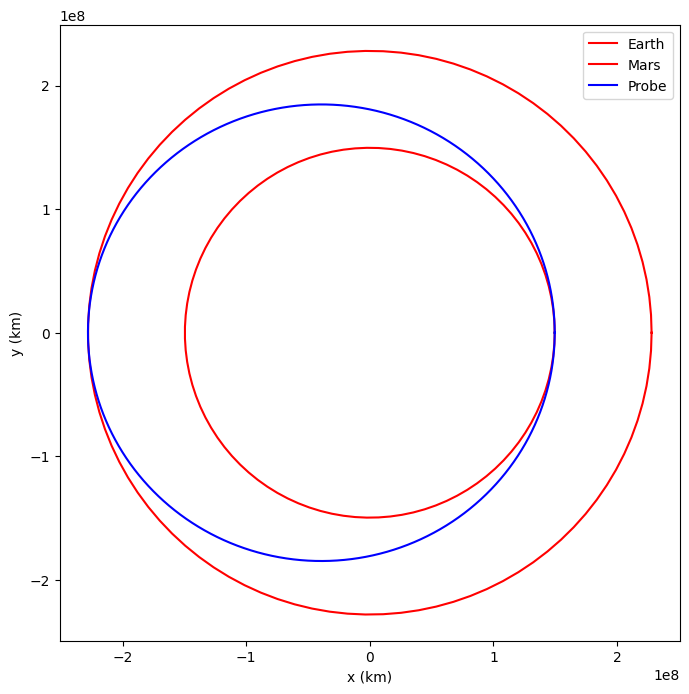

In [62]:
plt.figure(figsize=(8, 8))  # create figure, figsize can be changed as preferred

# Plotting Earth's and Mars' orbit
for dist in [1, 1.524]:
    uang = linspace(0, 2 * pi, 100)
    x = (UA_to_meters(dist) / 1e3) * cos(uang)
    y = (UA_to_meters(dist) / 1e3) * sin(uang)
    plt.plot(x, y, color='red')

plt.plot(posvel[:, 0] / 1e3, posvel[:, 1] / 1e3, color='blue') # plot the probe's orbit

plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis('equal')
plt.legend(['Earth', 'Mars', 'Probe'])
plt.show() # make plot appear

We check that the constraints are met, pherihelion and aphelion equal to 1UA and 1.524UA respectively.

Minimum distance : 1.0UA & Maximum distance : 1.5240001451531557UA


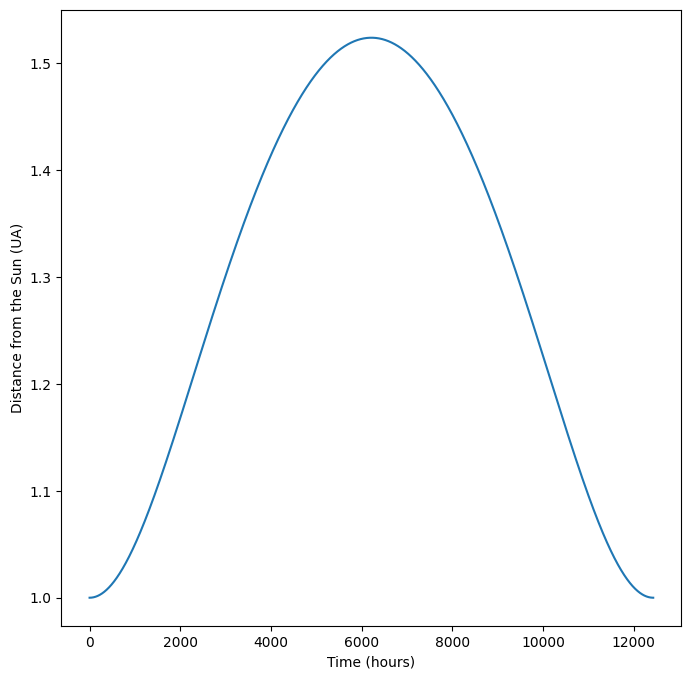

In [63]:
plt.figure(figsize=(8, 8))  # create figure, figsize can be changed as preferred
r = sqrt(posvel[:, 0] ** 2 + posvel[:, 1] ** 2) / 1.496e11 # distance from the Sun in UA
print(f"Minimum distance : {min(r)}UA & Maximum distance : {max(r)}UA")
plt.plot(t / 3600, r)
plt.xlabel('Time (hours)')
plt.ylabel('Distance from the Sun (UA)')
plt.show()

By reducing the initial velocity to 99.95% of the required velocity to reach Mars, we are quite far from the planet in absolute terms.

Minimum distance : 1.0UA & Maximum distance : 1.5201603801771235UA


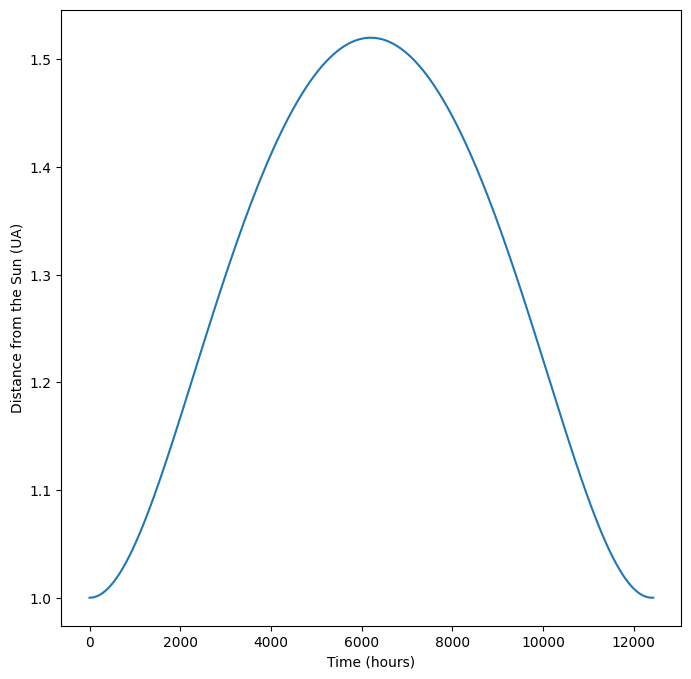

In [64]:
xy0 = [r_per, 0]  # start position
vxy0 = [0, v_per * 0.9995]  # start vertical speed

probe = Probe(probeqns, period, period / 3600, x0=xy0[0], vx0=vxy0[0], 
            y0=xy0[1], vy0=vxy0[1], event=r_per) # probe as an object
t, posvel = probe.odesolve() # solve the differential equations

plt.figure(figsize=(8, 8))  # create figure, figsize can be changed as preferred
r = sqrt(posvel[:, 0] ** 2 + posvel[:, 1] ** 2) / 1.496e11 # distance from the Sun in UA
print(f"Minimum distance : {min(r)}UA & Maximum distance : {max(r)}UA")
plt.plot(t / 3600, r)
plt.xlabel('Time (hours)')
plt.ylabel('Distance from the Sun (UA)')
plt.show()

In [65]:
UA_to_meters(1.524 - max(r)) / 1e3 # Distance from Mars in km

574407.1255023251

## Asteroid $2013LA_2$ analyze

Now we will study the transfer from Earth to asteroid $2013LA_2$.

In [66]:
ast_e = 0.4656 # Eccentricity of asteroid
ast_a = UA_to_meters(5.6841) # Semi-major axis of asteroid

ast_per = ast_a * (1 - ast_e) # Perihelion distance of asteroid
ast_aph = ast_a * (1 + ast_e) # Aphelion distance of asteroid

In [67]:
ast_per / 1e3 # Perihelion distance of asteroid in km

454422422.784

In [68]:
ast_aph / 1e3 # Aphelion distance of asteroid in km

1246260297.216

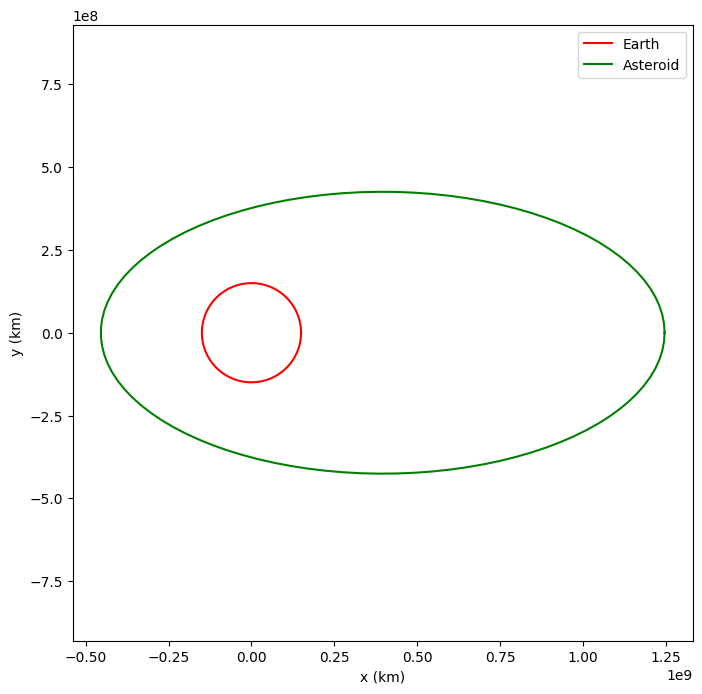

In [69]:
plt.figure(figsize=(8, 8))  # create figure, figsize can be changed as preferred

# Plotting Earth's orbit
uang = linspace(0, 2 * pi, 100)
x = (UA_to_meters(1) / 1e3) * cos(uang)
y = (UA_to_meters(1) / 1e3) * sin(uang)
plt.plot(x, y, color='red')

# Plotting Asteroid's orbit
u=(ast_a - ast_per) / 1e3
v=0
a=ast_a / 1e3
b=a / 2
t = linspace(0, 2*pi, 100)
x = u+a*cos(t)
y = v+b*sin(t)
plt.plot(x, y, color='green')

plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis('equal')
plt.legend(['Earth', 'Asteroid'])
plt.show() # make plot appear

### Least transit time

First, let's find the transfer that will take the least time. Looking at the graph above, we can think that this orbit will be from the Earth's orbit to the asteroid's perihelion, as this is the closest point the asteroid can get.

We can confirm this by analysing the period formula: $P=\sqrt{\frac{4\pi^2}{GM_{sun}}a^3}$ with $a=\frac{r_{perihelion}+r_{aphelion}}{2}$

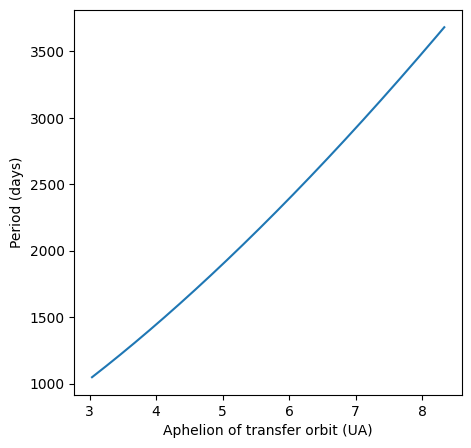

In [70]:
ast_alts = linspace(ast_per, ast_aph, 10000)
a = (ast_alts + UA_to_meters(1)) / 2

plt.figure(figsize=(5, 5))  # create figure, figsize can be changed as preferred
p = sqrt((4 * pi**2 * a**3)/(G * sun.mass))
plt.plot(ast_alts / 1.496e11, p / (24*3600))
plt.xlabel('Aphelion of transfer orbit (UA)')
plt.ylabel('Period (days)')
plt.show()

As we can see the further the aphelion the longer the orbital period, so for this transfer to be the fastest we will set our perihelion to the radius of the Earth's orbit and the aphelion to the asteroid's perihelion.

In [71]:
r_per = UA_to_meters(1)  # Perihelion distance = Earth-Sun distance
r_aph = ast_per  # Aphelion distance = Asteroid Perihelion distance

a = (r_per + r_aph) / 2  # Semi-major axis
a / 1.496e11  # Semi-major axis in UA

2.01879152

In [72]:
e = (r_aph - r_per) / (r_aph + r_per)  # Eccentricity
e # Eccentricity

0.5046541507168606

We can check what are the values of the period and the differences in speed at arrival.

In [73]:
period = sqrt((4 * pi**2 * a**3)/(G * sun.mass))
period / (24 * 3600)  # Orbital period in days

1048.0331243098324

In [74]:
ast_vel = sqrt(G * sun.mass * (2 / r_aph - 1 / ast_a))  # Velocity of asteroid
vel = sqrt(G * sun.mass * (2 / r_aph - 1 / a))  # Velocity of probe
abs(vel - ast_vel) / 1e3 # Difference in velocity in km/s

8.65849398421716

In [75]:
xy0 = [r_per, 0]  # start position
vxy0 = [0, sqrt(G * sun.mass * (2 / r_per - 1 / a))]  # start vertical speed

probe = Probe(probeqns, period, period / 3600, x0=xy0[0], vx0=vxy0[0], 
            y0=xy0[1], vy0=vxy0[1], event=r_per) # probe as an object
t, quickest_posvel = probe.odesolve() # solve the differential equations

### Smallest burn on arrival

For the second orbit, we are looking for the smallest burn on arrival, which means we want to have the smallest difference between the velocity of the asteroid and that of the spacecraft.

Firstly, we can imagine that we should target the asteroid's aphelion, as this is where its velocity is lowest. To confirm this, we could plot the difference in velocity between the two using the energy formula.

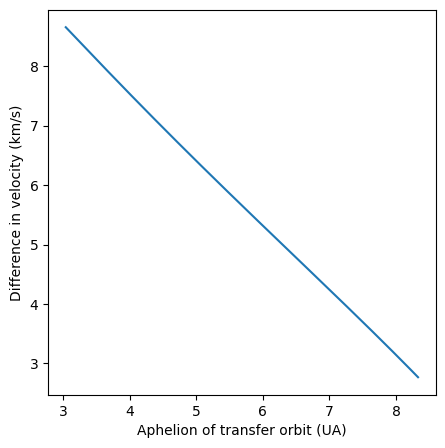

In [76]:
ast_alts = linspace(ast_per, ast_aph, 10000)
ast_vel = sqrt(G * sun.mass * (2 / ast_alts - 1 / ast_a))  # Velocity of asteroid
a = (ast_alts + UA_to_meters(1)) / 2
vel = sqrt(G * sun.mass * (2 / ast_alts - 1 / a))  # Velocity of probe
diff = abs(vel - ast_vel)

plt.figure(figsize=(5, 5))  # create figure, figsize can be changed as preferred
plt.plot(ast_alts / 1.496e11, diff / 1e3)
plt.xlabel('Aphelion of transfer orbit (UA)')
plt.ylabel('Difference in velocity (km/s)')
plt.show()

We can clearly see that the further away we are from the asteroid, the smaller the difference in speed. So for this orbit we will set our perihelion to the distance between the Sun and the Earth and our aphelion to the asteroid's aphelion.

In [77]:
r_per = UA_to_meters(1)  # Perihelion distance = Earth-Sun distance
r_aph = ast_aph  # Aphelion distance = Asteroid Perihelion distance

a = (r_per + r_aph) / 2  # Semi-major axis
a / 1.496e11  # Semi-major axis in UA

4.66530848

In [78]:
e = (r_aph - r_per) / (r_aph + r_per)  # Eccentricity
e # Eccentricity

0.7856519018437983

We can use the graph to check that the final value is what we expected.

In [79]:
ast_vel = sqrt(G * sun.mass * (2 / r_aph - 1 / ast_a))  # Velocity of asteroid
vel = sqrt(G * sun.mass * (2 / r_aph - 1 / a))  # Velocity of probe
abs(vel - ast_vel) / 1e3 # Difference in velocity in km/s

2.765259722793685

In [80]:
period = sqrt((4 * pi**2 * a**3)/(G * sun.mass))
period / (24 * 3600)  # Orbital period in days

3681.784370700488

In [81]:
xy0 = [-r_per, 0]  # start position
vxy0 = [0, sqrt(G * sun.mass * (2 / r_per - 1 / a))]  # start vertical speed

probe = Probe(probeqns, period, period / 3600, x0=xy0[0], vx0=vxy0[0], 
            y0=xy0[1], vy0=vxy0[1], event=r_per) # probe as an object
t, smallburn_posvel = probe.odesolve() # solve the differential equations

### Final plot

Finally, we can see the two trajectories to visually confirm our simulation. It is important to understand that burn on arrival and orbit period are inversely related and we have to make a trade-off, as we cannot lower one without raising the other and vice versa.

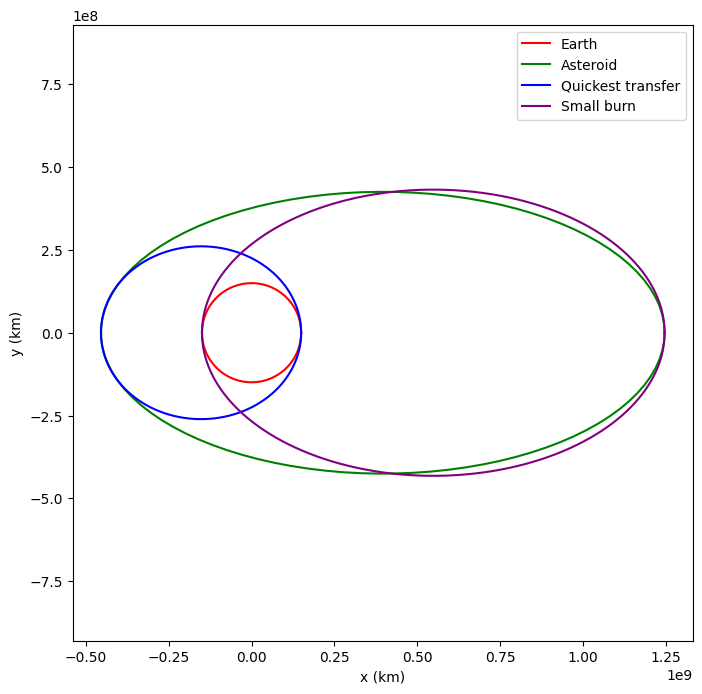

In [82]:
plt.figure(figsize=(8, 8))  # create figure, figsize can be changed as preferred

# Plotting Earth's orbit
uang = linspace(0, 2 * pi, 100)
x = (UA_to_meters(1) / 1e3) * cos(uang)
y = (UA_to_meters(1) / 1e3) * sin(uang)
plt.plot(x, y, color='red')

# Plotting Asteroid's orbit
u=(ast_a - ast_per) / 1e3
v=0
a=ast_a / 1e3
b=a / 2
t = linspace(0, 2*pi, 100)
x = u+a*cos(t)
y = v+b*sin(t)
plt.plot(x, y, color='green')

# Plotting probe's orbit with quickest transfer
plt.plot(quickest_posvel[:, 0] / 1e3, quickest_posvel[:, 1] / 1e3, color='blue')

# Plotting probe's orbit with small burn
plt.plot(smallburn_posvel[:, 0] / 1e3, smallburn_posvel[:, 1] / 1e3, color='purple')

plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis('equal')
plt.legend(['Earth', 'Asteroid', 'Quickest transfer', 'Small burn'])
plt.show() # make plot appear